In [0]:
path_ = ''

In [3]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)

In [0]:
data = pd.read_csv( path_ + 'task_b.csv')
data=data.iloc[:,1:]

In [6]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [7]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [8]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [6]:
X=data[['f1','f2','f3']].values
X_df = data[['f1','f2','f3']]
Y=data['y'].values
y = Y
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


[0.24105483 0.07588845 3.90356899]
[2 0 1]
[0.5 1.5 2.5]


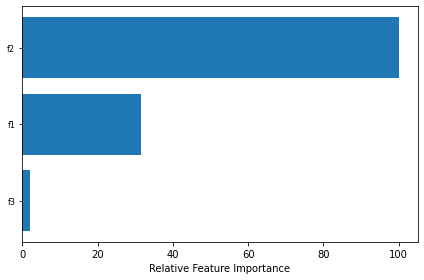

In [38]:


scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X_df.columns)

clf = LogisticRegression(random_state = 0)
clf.fit(X_scaled, y)

feature_importance = abs(clf.coef_[0])
print(feature_importance)
feature_importance = 100.0 * (feature_importance.min() / feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

[1.04782072e-03 1.18283398e-05 2.22419710e+00]
[2 0 1]
[0.5 1.5 2.5]


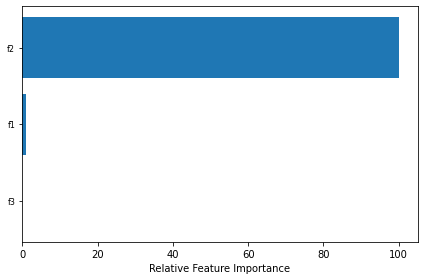

In [10]:

'''
scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X_df.columns) '''
#https://stackoverflow.com/questions/24255723/sklearn-logistic-regression-important-features

clf = LogisticRegression(penalty='l2', C=1.0,random_state = 10,max_iter=100)
clf.fit(X, y)

feature_importance = abs(clf.coef_[0])
print(feature_importance)
feature_importance = 100.0 * (feature_importance.min() / feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

[ 915.53217962  209.37297733 1210.57353774]
[2 0 1]
[0.5 1.5 2.5]


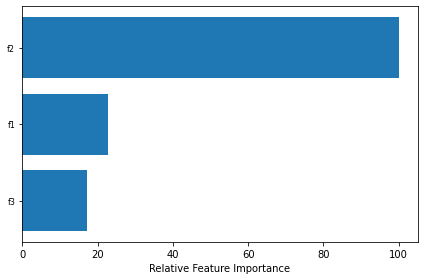

In [15]:
 
#from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss = 'log',alpha=0.001,random_state = 10, penalty="l2", max_iter=100)
clf.fit(X, y)

feature_importance = abs(clf.coef_[0])
print(feature_importance)
feature_importance = 100.0 * (feature_importance.min() / feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

[ 1.66735049  0.14693691 10.26703216]
[2 0 1]
[0.5 1.5 2.5]


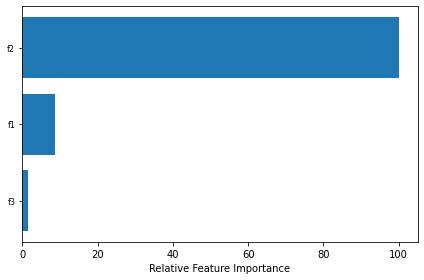

In [41]:
#https://stats.stackexchange.com/questions/336404/feature-importance-for-breast-cancer-random-forests-vs-logistic-regression

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X_df.columns)

clf = SGDClassifier(loss = 'log', penalty="l2", max_iter=50)
clf.fit( X_scaled , y)

feature_importance = abs(clf.coef_[0])
print(feature_importance)
feature_importance = 100.0 * (feature_importance.min() / feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

[ 7011.58823844  3403.75891343 10553.16476779]
[2 0 1]
[0.5 1.5 2.5]


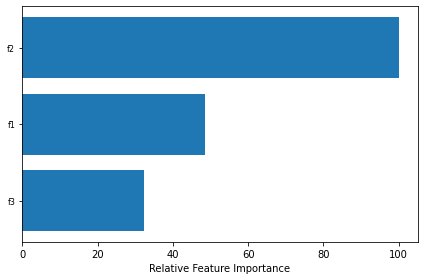

In [42]:

#loss = hinge

clf = SGDClassifier(loss = 'hinge', penalty="l2", max_iter=100)
clf.fit( X , y)

feature_importance = abs(clf.coef_[0])
print(feature_importance)
feature_importance = 100.0 * (feature_importance.min() / feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

[ 0.42751971  0.23396511 13.27167535]
[2 0 1]
[0.5 1.5 2.5]


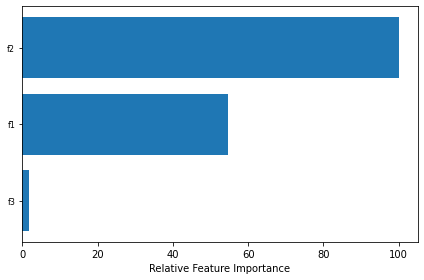

In [11]:

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = pd.DataFrame(scaler.transform(X),columns = X_df.columns)

clf = SGDClassifier(loss = 'hinge', penalty="l2", max_iter=100)
clf.fit( X_scaled , y)

feature_importance = abs(clf.coef_[0])
print(feature_importance)
feature_importance = 100.0 * (feature_importance.min() / feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos)

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_df.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()